### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

# Assignment 3: Classification with Logistic Regression  [ __ /100  marks]


In this assignment we will use the `diabetes` dataset, which was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. 

We will use logistic regression to predict whether subjects have diabetes or not.

## Global Toolbox

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
seed=0

## Question 1.1 [ _ /3 marks]

Read the file `diabetes.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. 

In [2]:
# ****** your code here ******
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question 1.2 [ _ /6 marks]

(1) How many classes are there? How many features are available to predict the outcome?

**Your answer**: 

There are two classes (either diabetic or non-diabetic), and 8 features available to predict the outcome.

(2) Is the dataset class-balanced?

In [3]:
# ****** your code here ******
num_diabetics = (df["Outcome"] == 1).sum()
num_non_diabetics = (df["Outcome"] == 0).sum()
print(f'Diabetics: {num_diabetics}')
print(f'Non-diabetic: {num_non_diabetics}')

Diabetics: 268
Non-diabetic: 500


**Your answer**: The dataset is not class-balanced: there are more non-diabetic datapoints than diabetic data points.

(3) For this classification problem, what is the baseline accuracy and how would you interpret it? Round into 3 decimal place.

In [4]:
# ****** your code here ******


baseline_accuracy = max(num_diabetics, num_non_diabetics) / (num_diabetics + num_non_diabetics)
print(f"Baseline Accuracy is: {baseline_accuracy:.3f}")

Baseline Accuracy is: 0.651


That is, the proportion of the majority class relative to the total is 0.651.

## Question 1.3 [ _ /3 marks]

Use `train_test_split` with `random_state=0` to split the data into training and test sets. Leave `20%` for testing.

In [5]:
# Store all the features into variable "X"
# ****** your code here ******
X = df.iloc[:, :-1]

# Store the output class values into variable "y" 
# ****** your code here ******
y = df.iloc[:, -1]

# Split your X and y data using train_test_split 
# ****** your code here ******
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=0.2, random_state=0)


## Question 2.1 [ _ /3 marks]

We will use sklearn's `LogisticRegression` to solve the classification problem. Before we move on, answer the following questions by reading the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


(1) Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**Your answer**: Yes, it uses L2 regularization.


    
(2) If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients (parameters), relative to not applying a penalty during learning?

**Your answer**: We would expect to see smaller paramter values when applying a penalty during learning vs. not applying a penalty during learning.


    
(3) If using the default settings of `LogisticRegression`, do you need to include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**Your answer**: No, we do not need to include a column of 1s in the design matrix: LogisticRegressin fits an intercept term automatically on its own.

## Question 2.2 [ _ /10 marks]

Create a `LogisticRegression` model with `penalty=none`. Let's fisrt train and test this classifier using only "Insulin" as the input feature. Make a scatter plot of the points. Plot your prediction on the same graph.

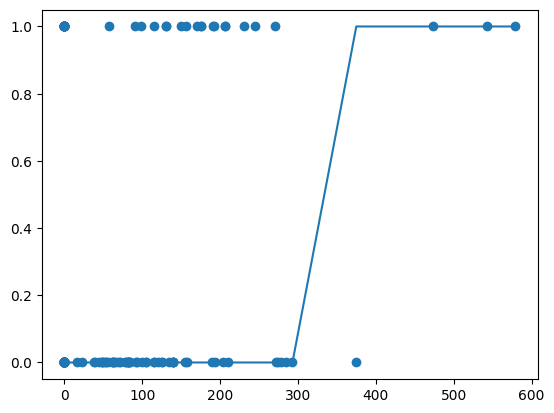

In [6]:
# Create a LogisticRegression model without regularization 
# ****** your code here ******
lr_model = LogisticRegression(penalty=None)

# Obtain training data and test data  
# ****** your code here ******
X_train_insulin = X_train_df['Insulin'].values.reshape(-1, 1)
y_train = y_train_df.values
X_test_insulin = X_test_df['Insulin'].values.reshape(-1, 1)
y_test = y_test_df.values

# Fit to your training data using Logistic Regression 
# ****** your code here ******
lr_model.fit(X_train_insulin, y_train)


# Create a scatter plot of the test data. 
# ****** your code here ******
plt.scatter(X_test_insulin, y_test)


# Also plot your prediction using sns.lineplot
# lineplot needs 1d vector x
predicted_probabilities = lr_model.predict(X_test_insulin)
y_test_prob_2_2 = lr_model.predict_proba(X_test_insulin)
sns.lineplot(x=X_test_insulin.flatten(), y=predicted_probabilities)
plt.show()



## Question 2.3 [ _ /10 marks]
Evaluate the classification performance using `Accuracy`, `Recall`, `Precision`, `Sensitivity` and `Specificity`.

In [7]:
# ****** your code here ******
# You can either write a function or not
def performance(y_pred, y_test):

    fp = sum(np.logical_and((y_pred == 1), (y_test == 0)))
    fn = sum(np.logical_and((y_pred == 0), (y_test == 1)))
    tp = sum(np.logical_and((y_pred == 1), (y_test == 1)))
    tn = sum(np.logical_and((y_pred == 0), (y_test == 0)))

    # Accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Precision
    precision = tp / (tp + fp)

    # Recall
    recall = tp / (tp + fn)

    # Sensitivity
    sensitivity = recall

    # Specificity
    specificity = tn / (fp + tn)

    print(f'Accuracy: {accuracy:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'Sensitivity: {sensitivity:.3f}')
    print(f'Specificity: {specificity:.3f}')


ypred = lr_model.predict(X_test_insulin) 
performance(ypred, y_test)


Accuracy: 0.708
Precision: 0.750
Recall: 0.064
Sensitivity: 0.064
Specificity: 0.991


## Question 3.1 [ _ /10 marks]

Create another `LogisticRegression` model with `penalty=none`. Train and test this classifier with all features and then evaluate the performance.

In [8]:
# Create a LogisticRegression model without regularization 
# ****** your code here ******
lr_model_no_penalty = LogisticRegression(penalty=None, max_iter=10000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Fit to your training data using Logistic Regression 
# ****** your code here ******
lr_model_no_penalty.fit(X_train, y_train)

# Compute your test predictions, given test inputs 
# ****** your code here ******
ypred = lr_model_no_penalty.predict(X_test)
y_test_prob_3_1 = lr_model_no_penalty.predict_proba(X_test)


# Evaluate the performance
# ****** your code here ******
performance(ypred, y_test)


Accuracy: 0.799
Precision: 0.744
Recall: 0.615
Sensitivity: 0.615
Specificity: 0.892


Does using more features help to improve the classification?

**Your answer** : Yes, using more features improves the accuracy, precision, and sensitivity. 

## Question 3.2 [ _ /10 marks]
Let's adjust the decision threshold from 0.5 (default) to 0.4 and 0.6, and then evlaute the performance.

In [9]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
# ****** your code here ******
threshold = 0.4
y_test_prob = lr_model_no_penalty.predict_proba(X_test)


# Evaluate the performance
# ****** your code here ******
ypred = lr_model_no_penalty.classes_[(y_test_prob[:, 1] > threshold).astype(int)]
performance(ypred, y_test)

Accuracy: 0.753
Precision: 0.625
Recall: 0.673
Sensitivity: 0.673
Specificity: 0.794


In [10]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
# ****** your code here ******
threshold = 0.6
y_test_prob = lr_model_no_penalty.predict_proba(X_test)


# Evaluate the performance
# ****** your code here ******
ypred = lr_model_no_penalty.classes_[(y_test_prob[:, 1] > threshold).astype(int)]
performance(ypred, y_test)

Accuracy: 0.779
Precision: 0.765
Recall: 0.500
Sensitivity: 0.500
Specificity: 0.922


What do you think is a better threshold? 

**Your answer**: 0.6 appears to be a better threshold: the accuracy, precision, and specificity is higher, at the cost of lower recall and sensitivity. However, in a medical context, it may be preferable to have lower false negatives: in this case it would be preferable to have 0.4 as a threshold. 

## Question 3.3 [ _ /10 marks]

Create a final `LogisticRegression` model with `penalty=l2`, `C=0.01`. Train and test this classifier with all features and then evaluate the performance.

In [11]:
# Create a LogisticRegression model
# ****** your code here ******
lr_model = LogisticRegression(penalty='l2', C=0.01, max_iter=10000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Fit to your training data using Logistic Regression 
# ****** your code here ******
lr_model.fit(X_train, y_train)

# Compute your test predictions, given test inputs 
# ****** your code here ******
ypred = lr_model.predict(X_test)
y_test_prob_3_3 = lr_model.predict_proba(X_test)


# Evaluate the performance
# ****** your code here ******
print(performance(ypred, y_test))


Accuracy: 0.799
Precision: 0.786
Recall: 0.600
Sensitivity: 0.600
Specificity: 0.909
None


Does regularization help to improve the classification?

**Your answer** : No, it does not appear to improve classification.

## Question 4 [ _ /15 marks]

Plot ROC Curves for the classifiers you used in questions 2.2, 3.1, and 3.3. Use AUC to determine which classifier is the best.

AUC of ROC curves:
Q2.2: 0.546
Q3.1: 0.457
Q3.3: 0.852



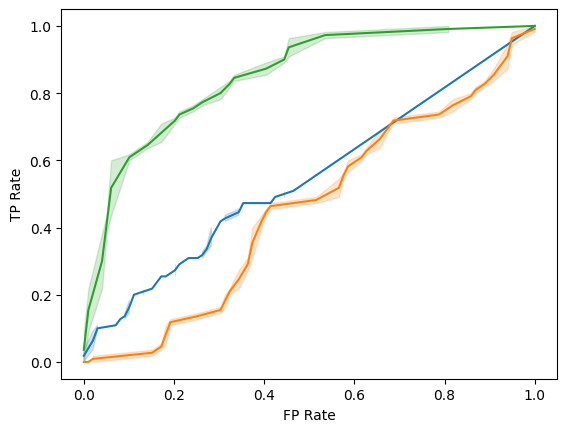

In [12]:
# Use roc_curve to get FPR and TPR for each of the 3 classifiers
fpr, tpr, _ = roc_curve(y_test, y_test_prob_2_2[:,1])
fprNoPenalty, tprNoPenalty, _ = roc_curve(y_test, y_test_prob_3_1[:,1])
fprL2, tprL2, _ = roc_curve(y_test, y_test_prob_3_3[:,1])

# Plot all of the ROC curves
ax = sns.lineplot(x=fpr,y=tpr)
ax = sns.lineplot(x=fprNoPenalty,y=tprNoPenalty)
ax = sns.lineplot(x=fprL2,y=tprL2)
ax.set_xlabel("FP Rate")
ax.set_ylabel("TP Rate")

# Determine AUC for each of the ROC curves
auc2_2 = auc(fpr, tpr).round(3)
auc3_1 = auc(fprNoPenalty, tprNoPenalty).round(3)
auc3_3 = auc(fprL2, tprL2).round(3)
print(f'''AUC of ROC curves:
Q2.2: {auc2_2}
Q3.1: {auc3_1}
Q3.3: {auc3_3}
''')

Which one is the best classifier?

**Your answer**: It appears that the classifier in 3.3 is the best classifier, as it has the highest AUC.

## Question 5 [ _ /10 marks]

Multiclass Logistic Regression

In the classification lab, we trained a binary LR classifier using the _mnist_ dataset to discriminate entries which were equal to 5 from the rest. Use the same dataset to train a multiclass **Logistic Regression** using the [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)  with `l2` regularization. So, this time you will have 10 classes, *i.e.*, 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. For training use `max_iter=2000`, `tol=1e-3`, `random_state=seed`. For some `sklearn` functions you can set argument `n_jobs=N` to run them in parallel and speed up computations. A good value for N can be the number of physical CPU cores that your machine possesses (`N=-1` would use all cores). Check the documentations of the functions to take advantage from this where possible.

First load the data and plot a histogram to comment on class distribution qualitatively. For splitting the data into train and test sets, use `test_size=0.5` and `random_state=seed`. What is the balanced accuracy score of your model?

/Users/david/Library/Python/3.9/lib/python/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


BAS: 0.866


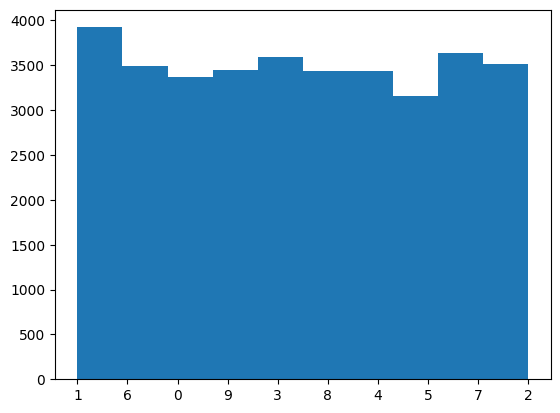

In [13]:
### your stuff
from sklearn.datasets import fetch_openml
from sklearn.metrics import balanced_accuracy_score

# Fetch dataset and values
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=seed)

# Plot histogram
plt.hist(y_train)

# Split data and fit model
model = SGDClassifier(max_iter=2000, tol=1e-3, random_state=seed, n_jobs=8)
model.fit(X_train, y_train)

# Calculate balanced accuracy store
y_pred = model.predict(X_test)
score = balanced_accuracy_score(y_test, y_pred)
print(f'BAS: {score:.3f}')


**Your written answer**: The balanced accuracy score is 0.866. 

## Question 6 [ _ /10 marks]

Run the cell below to see how well your model can recognize a digit drawn by the mouse cursor. Set the variable `final_model`, run the cell, draw on the pop-up canvas, and once you close the canvas you will see the model's recognition of your input.

Despite the cell using your classifier, which has a high balanced accuracy score, it often makes mistakes and its performance seems questionable. Try to explain in words why is that so?

Caveat: The cell below will not run on headless servers, you will need to use a local installation of python. You might have some fun until you can get it to work, but that's ok, because I want you to try your hands on technicalities and not always rely on online services.


Input recognized as 1.


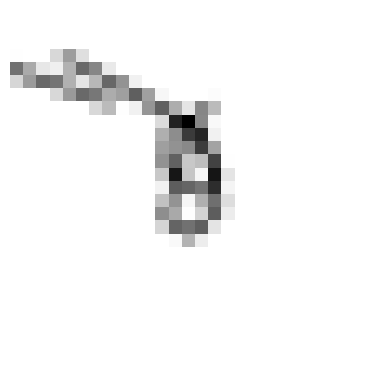

In [14]:
final_model=model # use the name of your final model
#!pip install tk-tools
from tkinter import *
import tkinter as tk
from PIL import Image
import io
import matplotlib as mpl

temp_file_name="TEMP_image_TEMP.jpg"
app = Tk()
app.geometry("300x300")
canvas = tk.Canvas(app, bg='white')
canvas.pack(anchor='nw', fill='both', expand=1)
def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw_smth(event):
    global lasx, lasy
    canvas.create_line((lasx, lasy, event.x, event.y), fill='red', width=4)
    lasx, lasy = event.x, event.y
    ps = canvas.postscript(colormode = 'color')
    img = Image.open(io.BytesIO(ps.encode('utf-8')))
    img.save(temp_file_name)

canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw_smth)

app.mainloop()
img = Image.open(temp_file_name)
#resize image to 28x28 pixels
img = img.resize((28,28))
#convert rgb to grayscale
img = img.convert("L")
img = np.array(img)
img = 255.0 - img
plt.imshow(img, cmap = mpl.cm.binary); plt.axis("off")
# reshaping to support our model input
img = np.reshape(img, 28*28)

#predicting the class
print('\nInput recognized as ' + str(final_model.predict([img])[0])+'.')

**Your answer**: Despite the high balanced accuracy score, the mistakes can be explained by the fact that the model isn't fully capturing the complexity of the problem. Indeed, the problem of classifying digits requires knowledge of the spatial relationships between the pixels, while this model only considers the pixels as a 1D object. Thus, perhaps the model may be overfitting to the specific type of data found in the MNIST data set, which doesn't account for all the different types of variability possible when drawing handwritten digits.